In [1]:
import csv
#import os
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
from PIL import ImageOps

dataDir = 'driveData/'
dataSet = 'track1_smooth'

# read in csv
# centerImg, leftImg, rightImg, steering angle, throttle, break, speed
csvFileName = '%s%s/driving_log.csv' % (dataDir, dataSet)
print(csvFileName)
y_data = []
with open(csvFileName, 'rt') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        y_data.append((row[0], row[3]))

driveData/track1_smooth/driving_log.csv


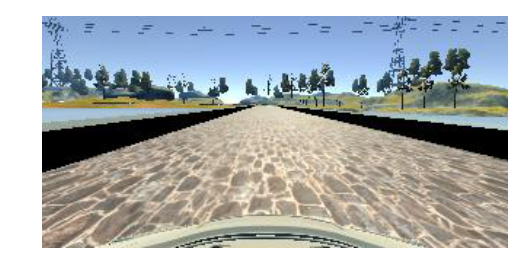

In [6]:
# read in img data
image_list = glob.glob('%s%s/IMG/center_*.jpg' % (dataDir, dataSet))
img = Image.open(image_list[0])
#img = mpimg.imread(image_list[0])

plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
print(len(y_data))
print(len(image_list))

7566
7566


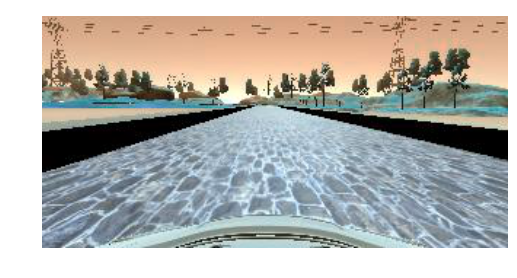

In [4]:
# just a dummy function right now to figure out pre-processing
imgCV2 = cv2.imread(image_list[0])
plt.imshow(imgCV2)
plt.axis('off')
plt.show()

In [5]:
print(img[0][0])
print(imgCV2[0][0])

TypeError: 'JpegImageFile' object does not support indexing

In [46]:
# mpimg reads images as RGB, CV2 as BGR
# ====> USE mpimg.imread!

(160, 320)
(64, 64)


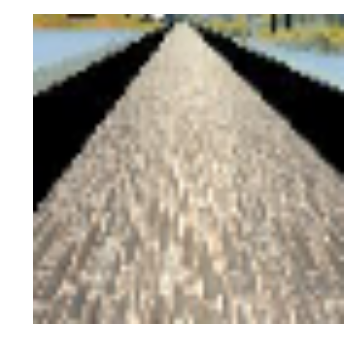

In [23]:
# preprocessing mockup
#print(img.size)
#print(img.getpixel((0,0)))

imgPath = image_list[0]
img = np.array(img) 
height, width = img.shape[:2]
print(img.shape[:2])

cropY = 60
targetResize = 64
blur = False

# CROP
imgCrop = img[cropY:height-25, 0:width] # Crop from x, y, w, h -> 100, 200, 300, 400

# RESIZE / Make image square
imgRes = cv2.resize(imgCrop, (targetResize, targetResize))

print(imgRes.shape[:2])

# BLUR
if blur:
    imgProc = cv2.GaussianBlur(imgRes,(3,3),0)
else:
    imgProc = imgRes
#print(imgProc[0][0])
# NORMALIZE
#imgProc = cv2.normalize(imgProc, alpha=0., beta=1., norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F, dst = imgProc)

plt.imshow(imgProc)
plt.axis('off')
plt.show()
#print(imgProc.shape[:2])
#print(imgProc[0][0])


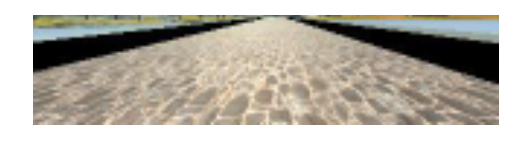

In [55]:
# flip image
flipImg = np.fliplr(imgProc)
plt.imshow(flipImg)
plt.axis('off')
plt.show()

{'right': 'driveData/track1_smooth/IMG\\right_2017_01_05_20_36_36_393.jpg', 'left': 'driveData/track1_smooth/IMG\\left_2017_01_05_20_36_36_393.jpg', 'center': 'driveData/track1_smooth/IMG\\center_2017_01_05_20_36_36_393.jpg', 'steer': '0'}


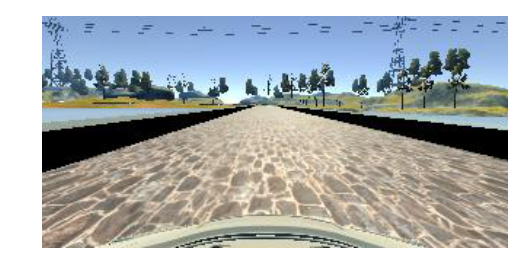

In [73]:
dataDir = 'driveData/'
dataSet = 'track1_smooth'
path = '%s%s/' % (dataDir, dataSet)
# read in csv
# centerImg, leftImg, rightImg, steering angle, throttle, break, speed
csvFileName = '%s/driving_log.csv' % (path)
csvData = []
with open(csvFileName, 'rt') as csvfile:
    reader = csv.reader(csvfile, skipinitialspace=True)
    for row in reader:
        csvData.append( {'center': '%s%s' % (path, row[0]), 'left': '%s%s' % (path, row[1]), 'right': '%s%s' % (path, row[2]), 'steer': row[3]})

print(csvData[0])
img = Image.open(csvData[0]['center'])
#img = mpimg.imread(image_list[0])

plt.imshow(img)
plt.axis('off')
plt.show()


In [56]:
arr = []
arr.append( {'center': 'Zara', 'left': '222', 'right': 'First', 'steer': -0.12})
arr[0]['center']

'Zara'

In [7]:
import numpy as np
np.random.uniform(0,1)

0.49632333745997115

In [4]:
import argparse
import base64
import json

import numpy as np
#import socketio
#import eventlet
#import eventlet.wsgi
import time
from PIL import Image
from PIL import ImageOps
from flask import Flask, render_template
from io import BytesIO